#### k-mean K-평균 -  비지도 학습  군집(Cluster) / 여기서 핵심은 K 임.

'''
초기 중심점을 임의로 설정을 합니다. (Centroid)

데이터를 할당합니다. (Assignment)

중심점을 업데이트합니다. (Update)
'''

In [123]:
import pandas as pd
df = pd.read_csv('D:\pandas_main\part7\data\CC-GENERAL.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\playdata\AppData\Local\Temp\ipykernel_8552\726524270.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('D:\pandas_main\part7\data\CC-GENERAL.csv')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [125]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [126]:
credit_df = df.copy()
credit_df = credit_df.drop(columns=['CUST_ID'])
# credit_df = credit_df[~credit_df.CREDIT_LIMIT.isna()] 이렇게 작성해도 됌

credit_df = credit_df.dropna(subset=['CREDIT_LIMIT']) #credit_df = credit_df.dropna(subset=['CREDIT_LIMIT']).isna().sum() 다른점
credit_df['MINIMUM_PAYMENTS'] = credit_df.MINIMUM_PAYMENTS.fillna( credit_df.MINIMUM_PAYMENTS.mean() )
credit_df.info()

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# imputer.fit_transform(credit_df).shape

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

<Axes: >

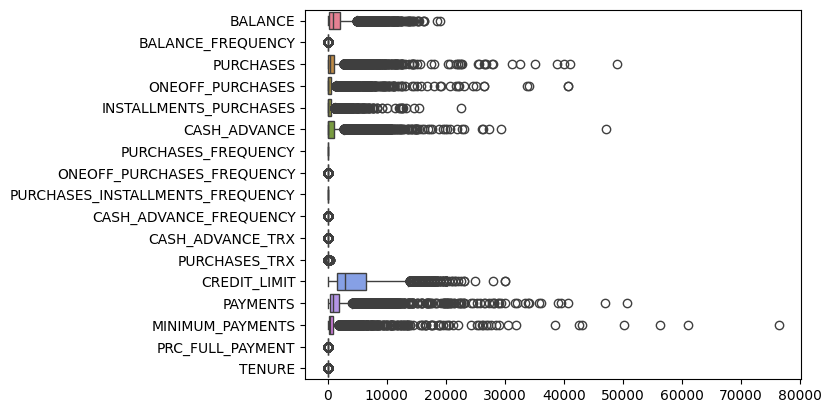

In [127]:
import seaborn as sns
sns.boxplot(data=credit_df,orient='h')

In [128]:
from sklearn.preprocessing import StandardScaler # 모델 선택
scaler = StandardScaler()
df_scaled = scaler.fit_transform(credit_df)
df_scaled[:3]

array([[-0.73205404, -0.24988139, -0.4249337 , -0.35695651, -0.34911414,
        -0.4668054 , -0.80664908, -0.67871619, -0.70740935, -0.67529446,
        -0.47608293, -0.51138082, -0.96037969, -0.52902627, -0.31099471,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , -0.35695651, -0.45460688,
         2.6054375 , -1.22192823, -0.67871619, -0.91708951,  0.57394905,
         0.11003155, -0.59184052,  0.68860056,  0.81854607,  0.08926366,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601,  0.10884332, -0.45460688,
        -0.4668054 ,  1.26974167,  2.67329468, -0.91708951, -0.67529446,
        -0.47608293, -0.10908229,  0.82601558, -0.38385745, -0.10170048,
        -0.52558844,  0.36054128]])

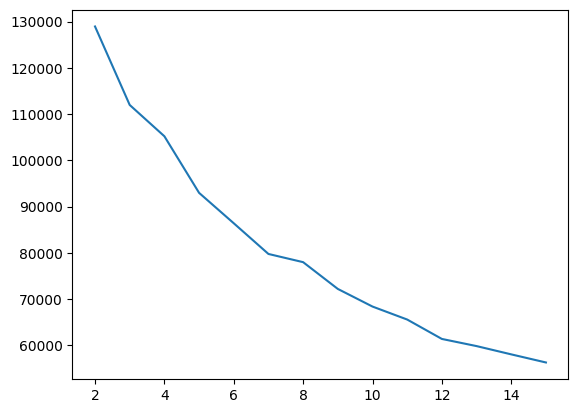

In [129]:
# 최적의 K 찾기 엘보우
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt

k_lists = []
for k in range(2,16):
    knn = KMeans(n_clusters=k, random_state=42)
    knn.fit(df_scaled)
    k_lists.append(knn.inertia_)
plt.plot(range(2,16),k_lists)
plt.show()

In [130]:
# k = 4
kmn = KMeans(n_clusters=4 , random_state=42)
clusters = kmn.fit_predict(df_scaled)  # .fit_predict 학습 예측까지 다 해줌 
credit_df['clusters'] = clusters


In [131]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [132]:
# 클러스터를 구분하는데 중요도 높은 컬럼 2개 찾기
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth= 3)
tree.fit(credit_df.drop(columns=['clusters']), credit_df.clusters)
tree.feature_importances_

array([0.00902932, 0.        , 0.3087426 , 0.        , 0.        ,
       0.30372584, 0.        , 0.        , 0.        , 0.02474178,
       0.        , 0.03875148, 0.        , 0.        , 0.        ,
       0.        , 0.31500898])

In [133]:
import numpy as np
top2 = np.argsort(tree.feature_importances_)[::-1][:2]
top2

array([16,  2])

In [134]:
credit_df.columns[ top2 ]

Index(['TENURE', 'PURCHASES'], dtype='object')

In [135]:
import numpy as np
top4 = np.argsort(tree.feature_importances_)[::-1][:4]
top4, credit_df.columns[top4]

(array([16,  2,  5, 11]),
 Index(['TENURE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_TRX'], dtype='object'))

In [136]:
temp = credit_df.loc[:,credit_df.columns[top4] ]
temp['clusters'] = clusters
temp

,TENURE,PURCHASES,CASH_ADVANCE,PURCHASES_TRX,clusters
0,12,95.40,0.000000,2,1
1,12,0.00,6442.945483,0,0
2,12,773.17,0.000000,12,1
3,12,1499.00,205.788017,1,1
4,12,16.00,0.000000,1,1
...,...,...,...,...,...
8945,6,291.12,0.000000,6,3
8946,6,300.00,0.000000,6,3
8947,6,144.40,0.000000,5,3
8948,6,0.00,36.558778,0,3


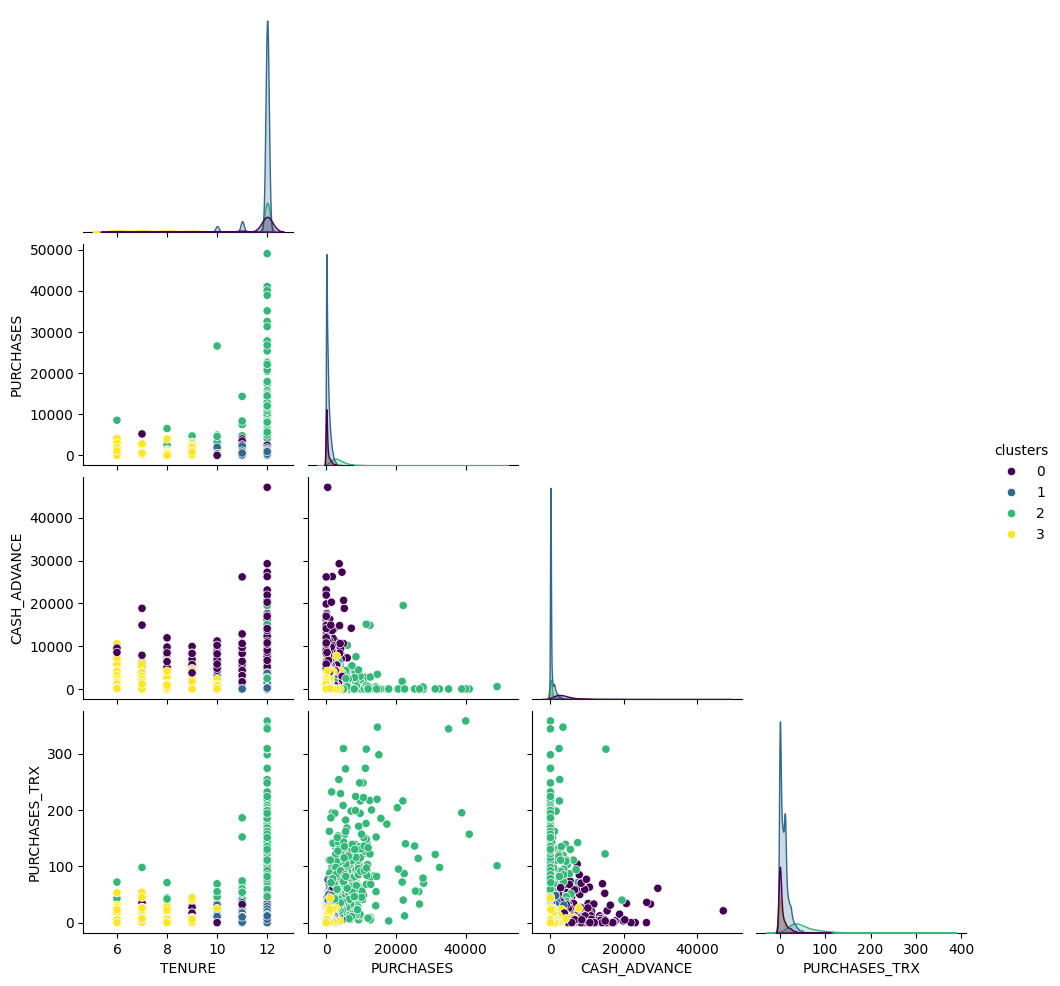

In [137]:
sns.pairplot(data = temp,hue='clusters' ,palette='viridis', corner=True)
plt.show()

C:\Users\playdata\AppData\Local\Temp\ipykernel_8552\981039723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp,x='clusters',y=colname,palette='viridis',ax=ax[i // 2, i %2])
C:\Users\playdata\AppData\Local\Temp\ipykernel_8552\981039723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp,x='clusters',y=colname,palette='viridis',ax=ax[i // 2, i %2])
C:\Users\playdata\AppData\Local\Temp\ipykernel_8552\981039723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp,x='clusters',y=colname,palette='viridis',ax=ax[i //

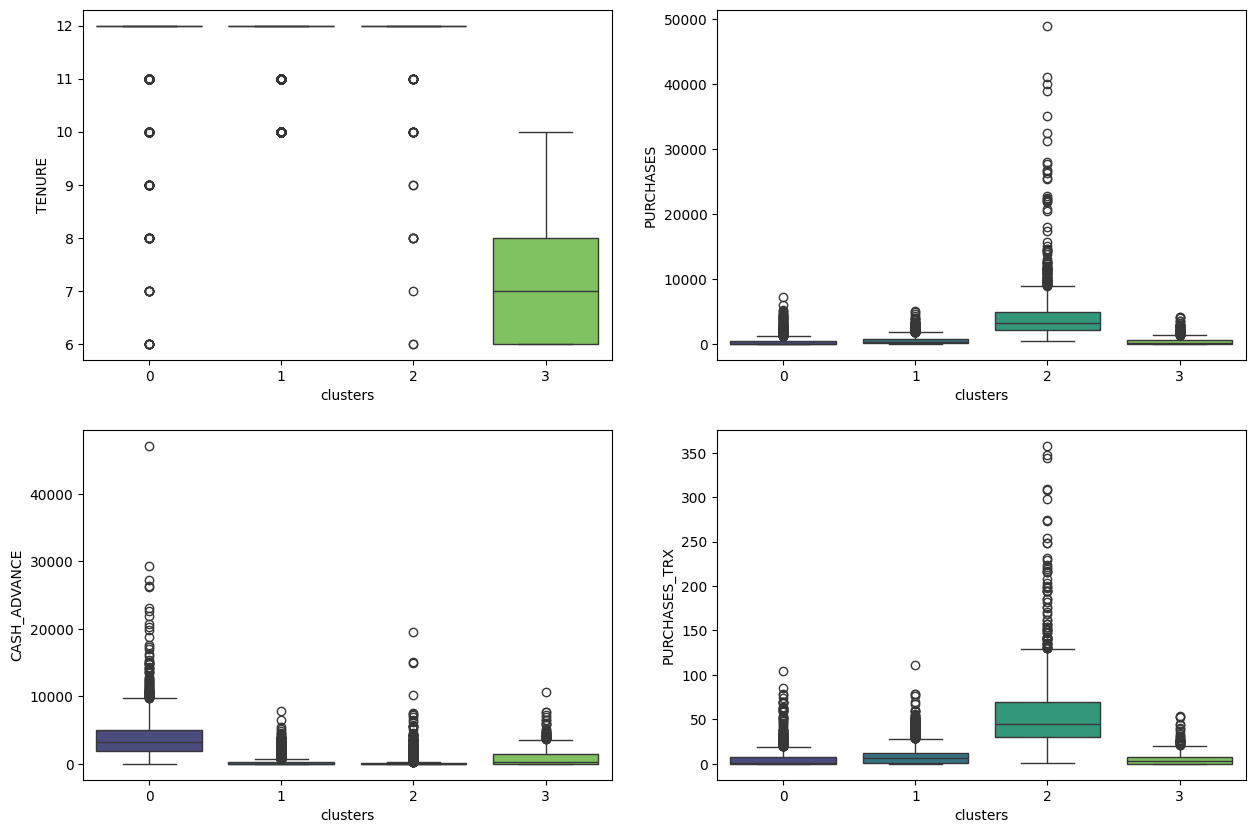

In [140]:
# boxplot
credit_df.columns[top4]
fig,ax = plt.subplots(2,2,figsize=(15,10))
for i ,colname in enumerate(temp.columns):
    if i != 4 : # top4에 들어있는 colunms 개수가 5개이기때문에
        sns.boxplot(data=temp,x='clusters',y=colname,palette='viridis',ax=ax[i // 2, i %2])

In [ ]:
# 클러스터 0 1 2 박스가 맨 위에 붙어있다. 
# 이 그룹의 고객들은 대부분 만기 회원임
# 3 클러스터는 가입기간이 6 ~ 8  --> 상대적으로 신규 또는 중간 가입기간

# 2 클러스터는 구매액으로 vvip그룹 나머지 클래스들은 총 구매액이 낮아.

# 0 클러스터 현금서비스로는 현금을 주로 사용하는 집단

# 2 클러스터 구매횟수로 거래 횟수가 많음

# 2 클러스터에 마케팅을 강화해야한다.구매액도 높고 거래횟수도 높기떄문에
